In [79]:
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pickle_save import load

In [15]:
from pathlib import Path
cdir = Path.cwd()
exp_dirs = [d for d in cdir.iterdir() if d.is_dir() and d.name.startswith('main_run')]

In [21]:
list(exp_dirs[0].iterdir())[0]

PosixPath('/home/alexh/kernelequationlearning/examples/darcy/darcy_experiment_nov5/main_run_seed12_40fun_5obs/u_results.png')

In [ ]:
metrics = [
    'u_error_onestep',
    'u_error_interp',
    '1step_op_errors',
    '2step_op_errors',
    '1step_forward_errors',
    '2step_forward_errors'
]
result_dict = {}
for exp_dir in exp_dirs:
    if (exp_dir / 'error_results.pickle').exists():
        settings = load(exp_dir / 'settings.pickle')
        result_dict[(settings['num_functions'],settings['random_seed'],settings['samples_per_functions'])] = (
            load(exp_dir / 'error_results.pickle')
        )
    
full_results = {x:{m:float(result_dict[x][m].mean()) for m in metrics} for x in result_dict.keys()}
df_results = pd.DataFrame(full_results).T
df_results.index.names = ['num_functions','seed','num_obs']

df_results = df_results.reset_index().groupby(['num_functions','num_obs']).mean().drop('seed',axis=1).reset_index()


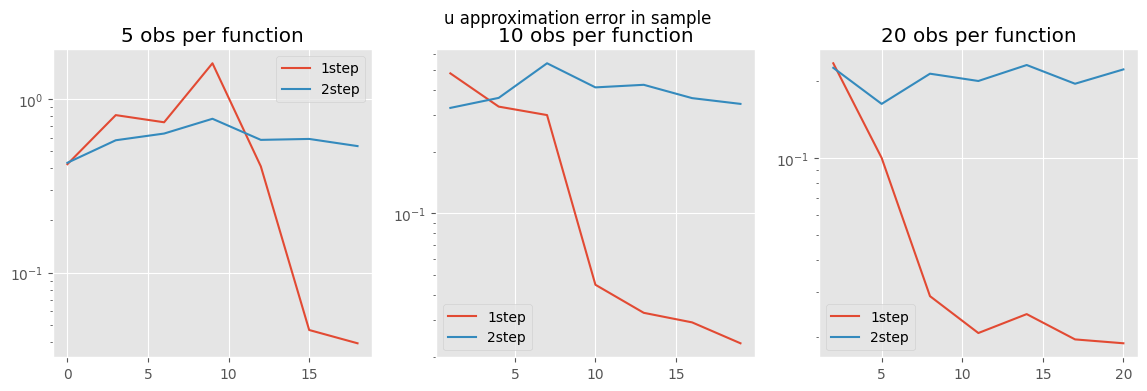

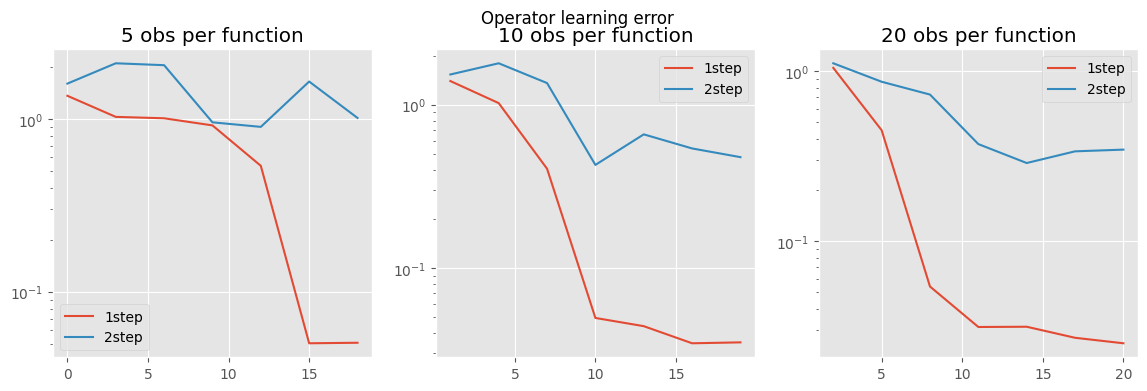

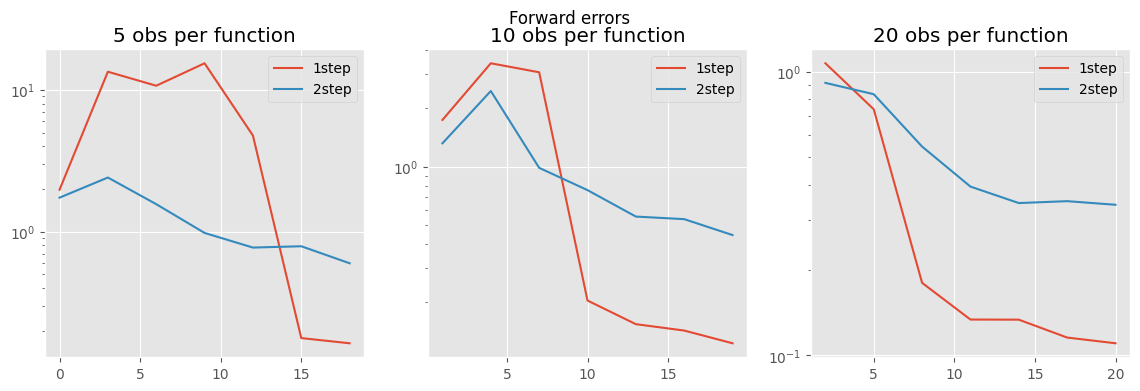

In [ ]:
metric_onestep = 'u_error_onestep'
metric_twostep = 'u_error_interp'
plt.figure(figsize=(14,4))
plt.suptitle('u approximation error in sample')
for i,k_obs in enumerate([5,10,20]):
    plt.subplot(1,3,i+1)
    plt.title(f"{k_obs} obs per function")
    plt.plot(df_results[df_results['num_obs']==k_obs][metric_onestep],label = '1step')
    plt.plot(df_results[df_results['num_obs']==k_obs][metric_twostep],label = '2step')
    plt.legend()
    plt.yscale('log')
plt.show()


metric_onestep = '1step_op_errors'
metric_twostep = '2step_op_errors'
plt.figure(figsize=(14,4))
plt.suptitle('Operator learning error')
for i,k_obs in enumerate([5,10,20]):
    plt.subplot(1,3,i+1)
    plt.title(f"{k_obs} obs per function")
    plt.plot(df_results[df_results['num_obs']==k_obs][metric_onestep],label = '1step')
    plt.plot(df_results[df_results['num_obs']==k_obs][metric_twostep],label = '2step')
    plt.legend()
    plt.yscale('log')
plt.show()

metric_onestep = '1step_forward_errors'
metric_twostep = '2step_forward_errors'
plt.figure(figsize=(14,4))
plt.suptitle('Forward errors')
for i,k_obs in enumerate([5,10,20]):
    plt.subplot(1,3,i+1)
    plt.title(f"{k_obs} obs per function")
    plt.plot(df_results[df_results['num_obs']==k_obs][metric_onestep],label = '1step')
    plt.plot(df_results[df_results['num_obs']==k_obs][metric_twostep],label = '2step')
    plt.legend()
    plt.yscale('log')
plt.show()



2     1.070764
5     0.737293
8     0.180278
11    0.133873
14    0.133724
17    0.115674
20    0.110418
Name: 1step_forward_errors, dtype: float64